# 데이터 수집 예시 (스크래핑)

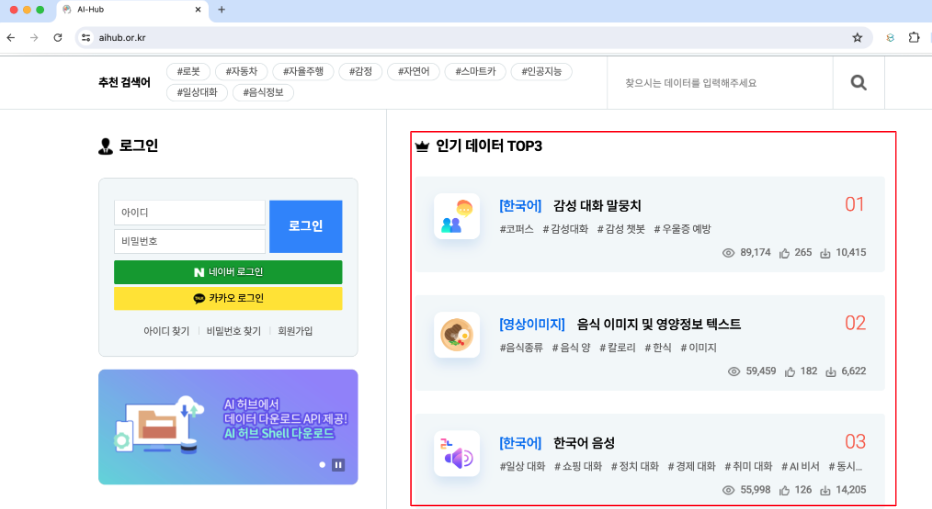

In [1]:
import requests
from bs4 import BeautifulSoup

# AI Hub 페이지 URL
url = "https://www.aihub.or.kr/"

try:
    # 웹 페이지 요청
    response = requests.get(url)
    response.raise_for_status() # 요청이 성공했는지 확인
    
    # BeautifulSoup 객체 생성
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # 인기 데이터 Top3 섹션 찾기
    top3_section = soup.find('div', class_='secR')
    if not top3_section:
        raise ValueError("Could not find the 'secR' section on the page.")
    
    # 각 데이터 항목 추출
    data_list = top3_section.find_all('div', class_='list')
    
    # 데이터 제목 추출 및 정리
    titles = [data.find('h3').get_text(strip=True).split(']')[-1].strip() for data in data_list]
    
    # 추출한 데이터 출력
    for idx, title in enumerate(titles, start=1):
        print(f"Top {idx}: {title}")
        
except requests.RequestException as e:
    print(f"Error during requests to {url}: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Top 1: 객체 간 관계성 인지용 한국형 비전 데이터
Top 2: 손∙팔 협조에 의한 파지-조작 동작 데이터
Top 3: 상용 자율주행차 야간 자동차 전용도로 데이터


# requests 라이브러리 및 BeautifulSoup 사용 예제

In [2]:
import requests
from bs4 import BeautifulSoup

def fetch_page(url: str) -> requests.Response:
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response
    except requests.RequestException as e:
        print(f"Error fetching page {url}: {e}")
        return None
    
def parse_page(content: str) -> dict:
    soup = BeautifulSoup(content, 'html.parser')
    
    # Extract the title
    title_tag = soup.find('h1', id='firstHeading')
    title = title_tag.text.strip() if title_tag else 'No title found'
    
    # Extract the first paragraph
    paragraph_tag = soup.find('p')
    first_paragraph = paragraph_tag.text.strip() if paragraph_tag else 'No first paragraph'
    
    return {
        'title': title,
        'first_paragraph': first_paragraph
    }
    
url = "https://ko.wikipedia.org/wiki/위키백과:대문"
response = fetch_page(url)

if response:
    parsed_data = parse_page(response.content)
    print(f"Title: {parsed_data['title']}")
    print(f"First paragraph: {parsed_data['first_paragraph']}")
else:
    print("Failed to retrieve the web page.")

Title: 위키백과:대문
First paragraph: 위키백과


# Selenium 라이브러리 사용예제

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

# URL 설정
URL = "https://ko.wikipedia.org/wiki/위키백과:대문"

# Chrome 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--no-sandbox')

# 웹 드라이버 설정 및 관리
with webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options) as driver:
    try:
        # 위키백과 대문 페이지 열기
        driver.get(URL)
        
        # "우리 모두가 만들어가는 자유 백과사전"과 "문서 이하 내용" 추출
        main_content = driver.find_element(By.CSS_SELECTOR, "div.main-box.main-top > div > p:nth-of-type(2)").text
        print("Main Content:", main_content)
    except Exception as e:
        print(f"An error occurred: {e}")

Main Content: 우리 모두가 만들어가는 자유 백과사전
문서 675,379개와 최근 기여자 1,737명


Scrapy 라이브러리 사용 예제

In [4]:
!scrapy startproject wikipedia_scraper

Error: scrapy.cfg already exists in C:\Users\Sangjin\OneDrive\바탕 화면\기타\문서\카카오테크 부트캠프\주차별 정리\1주차\Day 1\wikipedia_scraper


In [5]:
import scrapy

class WikipediaSpider(scrapy.Spider):
    name = "wikipedia"
    start_urls = [
        "https://ko.wikipedia.org/wiki/위키백과:대문",
    ]

    def parse(self, response):
        # Extract the desired content using a refined CSS selector
        main_content = response.css("#mw-content-text .mw-content-ltr .main-pane .main-pane-right .wikipedia-ko.main-recommended.main-box::text").getall()
        
        # Clean the extracted content and join it into a single string
        main_content = ' '.join([text.strip() for text in main_content if text.strip()])
        
        yield {
            'main_content': main_content,
        }

In [6]:
%%writefile -a wikipedia_scraper/wikipedia_scraper/settings.py
ROBOTSTXT_OBEY = False

Appending to wikipedia_scraper/wikipedia_scraper/settings.py


In [ ]:
from scrapy.crawler import CrawlerProcess
from scrapy.utils.project import get_project_settings

# Define Scrapy settings
settings = {
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'ROBOTSTXT_OBEY': False,
    'FEEDS': {
        'output.json': {
            'format': 'json',
            'encoding': 'utf8',
            'store_empty': False,
            'fields': None,
            'indent': 4,
        },
    },
}

# Initialize the crawler process with the defined settings
process = CrawlerProcess(settings)

# Add the spider to the crawling process
process.crawl(WikipediaSpider)

# Start the crawling process
process.start()

In [9]:
!python ./wikipedia_scraper/wikipedia_scraper/run_scrapy.py

^C
